# Open Midterm 1

## FINM 36700 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* For every minute late you submit the exam, you will lose one point.

Rules
* The exam is open-material, closed-communication.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.

## Data

**All data files are found in at the course web-book.**

https://markhendricks.github.io/finm-portfolio/. 

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 70     |
| 2       | 30     |

**Numbered problems are worth 5pts unless specified otherwise.**

***

## Submitting your Exam

Your submitted file (ipynb or .zip) must be named in the format...
* `midterm-1-LASTNAME-FIRSTNAME.ipynb`
* `midterm-1-LASTNAME-FIRSTNAME.zip`

Submit the exam via
* Canvas at Assignments/Midterm 1
* If there is any trouble with Canvas, or for a backup, submit it at the course web-book
https://markhendricks.github.io/finm-portfolio/. 

Your submission must be complete.
* If we can't run the notebook to reproduce, it is not complete.

You should either...
* include all helper functions at the top of this notebook in the `Solution Functions` sections.
* submit a zipped folder containing the solution functions

__Exam Submission Structure:__

If you are submitting a zipped folder (because you cannot make the ipynb stand-alone) then use this structure...

```plaintext
exam-open-LASTNAME-FIRSTNAME.zip/
│── exam-open.ipynb
│── data/
│   ├── example_data.csv
│── modules/
│   ├── my_functions.py

***

## Your Functions

Please put all functions needed to run the ipynb here.

* We must be able to run the notebook!
* If you can't get all the functions into this ipynb, then make sure to zip your ipynb and supporting materials and submit the zipped folder.
* But most of you should be able to submit a single, stand-alone ipynb.

***

## Citations

### AI

List any AI tools used in the exam. No need to list prompts, but rather just AI models or IDE integrations.

I expect most students will have something to list here.



* chat GPT plus
* 
* 



### Other resources

Please list any other resources **aside from course materials** from which you used substantially. (No need to list every Google search; just materials from which you used substantially or for specific, original content.) 

I expect most students will not have anything to list here.

* 
* 
* 

***

# Your Name

List your name and CNetID

* Name: Mohammed Rhazi
* CNetID: 12506615

***

# 1. Portfolio Analysis

### Data

Use the data in `data/midterm_1_stock_returns.xlsx`.

The returns are...
* excess returns
* weekly
* through `May 2025`

It has returns for
* `25` single-name equities
* `SPY`

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#DATAFILE_STOCKS = '../data/midterm_1_stock_returns.xlsx'
DATAFILE_STOCKS = 'midterm_1_stock_returns.xlsx'

SHEET = 'stock rets'
rets = pd.read_excel(DATAFILE_STOCKS, sheet_name=SHEET, index_col='date', parse_dates=['date'])

SHEET = 'benchmark rets'
spy = pd.read_excel(DATAFILE_STOCKS, sheet_name=SHEET, index_col='date', parse_dates=['date'])

display(rets)
display(spy)

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,-0.021166,-0.008927,-0.078893,-0.000577,0.026536,0.069378,-0.024107,-0.030450,-0.003635,-0.002414,...,0.093897,-0.008843,-0.002101,-0.023393,-0.001091,0.013659,-0.008009,-0.009050,-0.004251,0.040160
2015-01-16,-0.024369,-0.015313,-0.041579,-0.045022,0.012374,0.001515,0.019290,0.019265,0.019738,0.036405,...,0.007512,-0.024325,0.011081,-0.009830,-0.012042,-0.020590,0.048080,0.002865,0.013778,-0.028873
2015-01-23,0.023571,0.016282,0.029527,-0.004231,0.050829,0.013841,0.009121,0.012027,0.016490,0.014229,...,-0.008567,0.037842,-0.005804,-0.003565,0.080951,0.023033,0.022253,-0.031965,0.014548,0.020053
2015-01-30,-0.071920,0.069487,-0.027466,-0.018513,-0.003684,0.012031,-0.039124,-0.035766,0.002540,-0.017317,...,-0.035366,0.002970,-0.064277,-0.033041,-0.014190,-0.014506,-0.004689,-0.019552,-0.029622,-0.039883
2015-02-06,0.056754,0.037577,0.012818,0.048856,0.001733,-0.028619,-0.009970,0.044489,-0.020120,-0.049186,...,-0.024717,0.016318,0.015660,0.040609,0.010108,0.026985,-0.031460,0.013922,0.019639,0.027653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-25,0.040313,0.029300,0.057973,0.026441,-0.032822,0.047663,-0.015252,0.015993,0.060806,0.009060,...,0.060769,0.056550,-0.050440,0.119960,-0.030426,0.012465,0.059266,0.075389,-0.011260,0.020059
2025-05-02,0.037269,0.058609,0.075305,0.048372,0.066673,0.027144,0.012034,0.048705,0.024114,0.011873,...,0.005318,0.035996,-0.003105,0.036556,0.089469,-0.000845,-0.026089,0.063966,0.024660,0.038490
2025-05-09,0.026751,-0.002337,-0.025037,0.000158,-0.017498,0.022457,-0.020478,0.022692,-0.005563,-0.001760,...,-0.086679,-0.017300,-0.017817,0.001822,-0.009381,0.007206,0.032118,0.013872,-0.005087,-0.018189


,SPY
date,
2015-01-09,-0.005744
2015-01-16,-0.012827
2015-01-23,0.016565
2015-01-30,-0.026931
2015-02-06,0.030584
...,...
2025-04-25,0.046029
2025-05-02,0.029275
2025-05-09,-0.004270


## 1 Performance Stats

 1.1. Calculate the Sharpe ratio for each stock during the sample period
* Recall: the sample period ranges from **February 2018 to December 2024 (inclusive)**.
* Report the top 5 stocks with the highest Sharpe ratios.

In [325]:
ANN=12
retsIS = rets.loc["2015-01-01":"2024-12-31"]

mean_ret = retsIS.mean()
vol_ret  = retsIS.std()

sharpe = mean_ret / vol_ret

top5 = sharpe.sort_values(ascending=False).head(5)
print(top5)

WM       0.128937
GOOGL    0.118540
INTU     0.116997
TTWO     0.108924
WMT      0.107254
dtype: float64


1.2. Display the correlation matrix for the first ten stocks (columns) over the sample period.
* On average, are these stocks highly correlated? Explain.
* Which of these stocks offer the best diversification benefits?

In [326]:
subset = sample.iloc[:, :10]

# 3️⃣ Compute the correlation matrix
corr_matrix = subset.corr()

# 4️⃣ Display neatly
print(corr_matrix.round(3))

       ADSK    AOS   BKNG   CBRE    CCI     CF   CHRW     DE    DGX    DTE
ADSK  1.000  0.402  0.502  0.449  0.320  0.199  0.269  0.325  0.290  0.188
AOS   0.402  1.000  0.458  0.582  0.396  0.301  0.380  0.527  0.391  0.323
BKNG  0.502  0.458  1.000  0.553  0.215  0.305  0.234  0.443  0.245  0.293
CBRE  0.449  0.582  0.553  1.000  0.398  0.411  0.236  0.463  0.405  0.480
CCI   0.320  0.396  0.215  0.398  1.000  0.127  0.216  0.236  0.399  0.535
CF    0.199  0.301  0.305  0.411  0.127  1.000  0.243  0.465  0.252  0.272
CHRW  0.269  0.380  0.234  0.236  0.216  0.243  1.000  0.326  0.195  0.220
DE    0.325  0.527  0.443  0.463  0.236  0.465  0.326  1.000  0.305  0.353
DGX   0.290  0.391  0.245  0.405  0.399  0.252  0.195  0.305  1.000  0.482
DTE   0.188  0.323  0.293  0.480  0.535  0.272  0.220  0.353  0.482  1.000


On average, these stocks are moderately correlated, not highly correlated. They move together somewhat (average around 0.45)
CF, CHRW, & CCI show the lowest average correlations with the rest


## 2. In-Sample Tangency (excess returns)

#### Note
Consider `in-sample` to be all the data through the end of `2024`.

#### 2.1. Construct the tangency portfolio

Using just the in-sample data (through `2024`), calculate the tangency portfolio weights, assuming we have excess returns (existence of a risk-free rate.)
   * Display the ten largest portfolio weights.
   * Plot the Sharpe ratios against the portfolio weights.

Top 10 Tangency Portfolio Weights:
        weights
DTE    0.452431
WM     0.364931
GOOGL  0.205688
TTWO   0.198862
DE     0.191454
WMT    0.185139
MRK    0.168538
CBRE   0.167008
PG     0.087959
INTU   0.084542


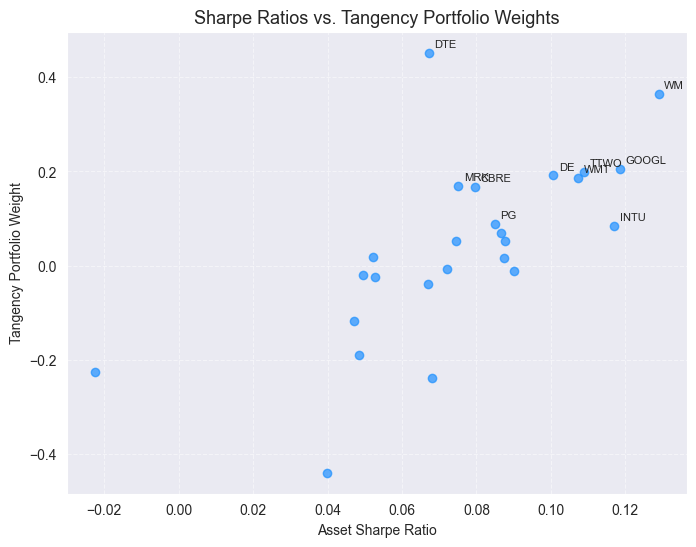

In [327]:
def tangency(returns, scale):
    cov=returns.cov()
    covmat = scale * cov + (1-scale) * np.diag(np.diag(cov))
    weights = np.linalg.solve(covmat,returns.mean())
    weights /= sum(weights)
    return weights

weights_series = pd.Series(tangency(retsIS, 1), index=retsIS.columns)

# Make into DataFrame and sort
weights_df = pd.DataFrame(weights_series, columns=["weights"])
top10 = weights_df.sort_values("weights", ascending=False).head(10)

print("Top 10 Tangency Portfolio Weights:")
print(top10.round(6))

weights = pd.Series(tangency(retsIS, 1), index=retsIS.columns)

# 2️⃣ Compute individual asset Sharpe ratios (mean/std of excess returns)
sharpe_ratios = retsIS.mean() / retsIS.std()

# 3️⃣ Combine into one DataFrame for plotting
df_plot = pd.DataFrame({
    "Sharpe": sharpe_ratios,
    "Weight": weights
}).dropna()

# 4️⃣ Plot: Sharpe ratios (x-axis) vs portfolio weights (y-axis)
plt.figure(figsize=(8,6))
plt.scatter(df_plot["Sharpe"], df_plot["Weight"], color="dodgerblue", alpha=0.7)
plt.title("Sharpe Ratios vs. Tangency Portfolio Weights", fontsize=13)
plt.xlabel("Asset Sharpe Ratio")
plt.ylabel("Tangency Portfolio Weight")

# Label the 10 largest weights
top10 = df_plot["Weight"].nlargest(10)
for ticker in top10.index:
    plt.annotate(ticker,
                 (df_plot.loc[ticker, "Sharpe"], df_plot.loc[ticker, "Weight"]),
                 textcoords="offset points",
                 xytext=(4,4),
                 fontsize=8)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


#### 2.2.

Compare the relationship between tangency portfolio weights and individual sharpe ratios.

Higher Sharpe assets tend to have larger weights, but not strictly monotonic. Some sharpe ratios with small weights ie highly correlated with others or less diversifying. The low sharpe ratios with positive weights might be used as diversifiers with low correlation

#### 2.3. Performance of the Tangency

Continue with the in-sample tangency portfolio constructed above, and analyze how it performs in-sample (through `2024`.)

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)
   
   Plot the cumulative return of the tangency portfolio over the sample period.

        Tangency Portfolio
mean                0.0691
std                 0.0870
sharpe              0.7942
skew               -0.0830


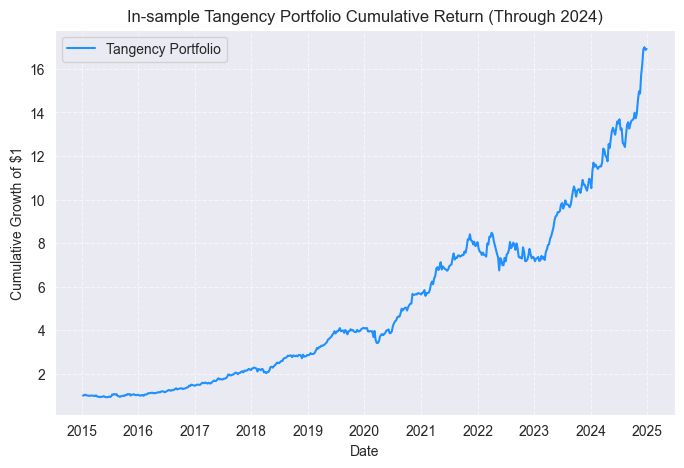

In [328]:
ANN=12
def perf_stats(returns):
    stats = {}
    stats['mean']   = returns.mean() * ANN
    stats['std']    = returns.std() * np.sqrt(ANN)
    stats['sharpe'] = (returns.mean() / returns.std()) * np.sqrt(ANN)
    stats['skew']   = returns.skew()
    return pd.DataFrame(stats, index=["Tangency Portfolio"]).T

# Compute tangency portfolio returns (dot product)
# weights_df should have a single column 'weights' aligned with rets.columns
port_rets = retsIS @ weights_df['weights']

# Performance statistics
results = perf_stats(port_rets)
print(results.round(4))

# --- Plot cumulative returns ---
cumulative = (1 + port_rets).cumprod()

plt.figure(figsize=(8,5))
plt.plot(cumulative, label="Tangency Portfolio", color='dodgerblue')
plt.title("In-sample Tangency Portfolio Cumulative Return (Through 2024)")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth of $1")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


## 3. Hedging the Tangency Portfolio

Continue with the in-sample (through 2024) tangency returns calculated in the previous problem.

#### 3.1.

Compute portfolio returns and regress on `SPY` to get $\hat{\beta}$. 

Include an intercept in the regression.

Report $\hat{\beta}$.

#### 3.2. 

Calculate the returns to the hedged position.

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)


In [329]:
#3.1
import statsmodels.api as sm

# Tangency portfolio returns (from previous step)
port_rets = retsIS @ weights_df['weights']

# Restrict to in-sample period through 2024
port_rets_IS = port_rets.loc[:'2024-12-31']
spy_IS = spy.loc[:'2024-12-31']  # assuming SPY column exists in rets

# Add intercept
X = sm.add_constant(spy_IS)
y = port_rets_IS

# Run OLS regression
model = sm.OLS(y, X).fit()

beta = model.params['SPY']

print(f"Beta of the tangency portfolio (in-sample): {beta:.4f}")

#3.2
port_rets_IS = (rets @ weights_df['weights']).loc[:'2024-12-31']
spy_IS = spy.loc[:'2024-12-31']  # independent DataFrame with SPY excess returns

# --- 2️⃣ Regress tangency returns on SPY to estimate beta ---
X = sm.add_constant(spy_IS)
model = sm.OLS(port_rets_IS, X).fit()
beta = model.params[spy_IS.columns[0]]  # extract beta from regression

# --- 3️⃣ Compute hedged returns (remove market exposure) ---
hedged_rets = port_rets_IS - beta * spy_IS.squeeze()

# --- 5️⃣ Display results ---
results_hedged = perf_stats(hedged_rets)
print(results_hedged.round(4))


Beta of the tangency portfolio (in-sample): 0.6048
        Tangency Portfolio
mean                0.0498
std                 0.0720
sharpe              0.6919
skew                0.1697


## 4. Out-of-Sample

#### 4.1. Tangency Portfolio Performance: Out-of-Sample (OOS)

Use the weights of the tangency portfolio calculated above.

Compute the out-of-sample returns (`2025`), and just for this OOS portion, report the (annualized)
* mean
* volatility
* Sharpe ratio
* skewness (not annualized)
   
   
#### 4.2. Cumulative performance

* Include the OOS performance in the cumulative return plot (in addition to the in-sample performance).

Show the plot.

        Tangency Portfolio
mean                0.1003
std                 0.1042
sharpe              0.9624
skew               -0.2853


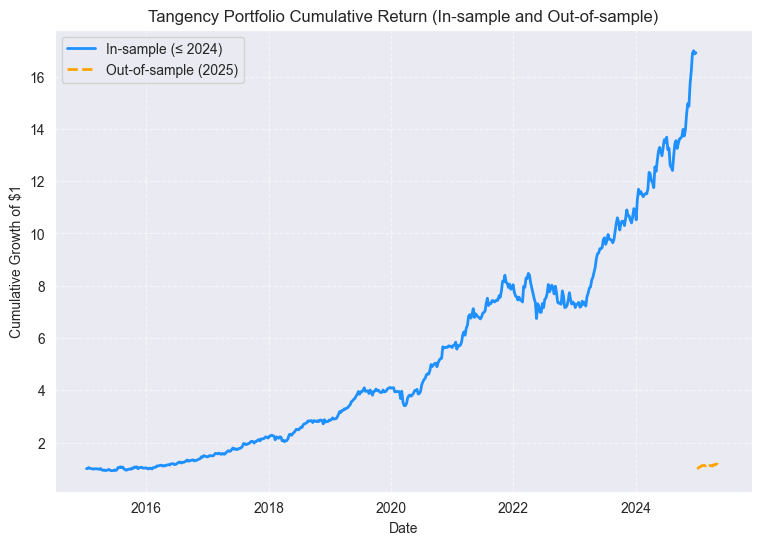

Out-of-sample performance (2025):
        Tangency Portfolio
mean                0.1003
std                 0.1042
sharpe              0.9624
skew               -0.2853


In [330]:
#4.1
port_rets_OOS = (rets.loc["2025-01-01":"2025-12-31"] @ weights_df["weights"])

# --- 3️⃣ Compute and display
results_OOS = perf_stats(port_rets_OOS)
print(results_OOS.round(4))


#4.2
port_rets_IS  = (rets.loc[:"2024-12-31"] @ weights_df["weights"])
port_rets_OOS = (rets.loc["2025-01-01":"2025-12-31"] @ weights_df["weights"])

# --- 2️⃣ Combine for plotting cumulative return ---
cumulative_IS  = (1 + port_rets_IS).cumprod()
cumulative_OOS = (1 + port_rets_OOS).cumprod()

# Concatenate for continuous time axis
cumulative_total = pd.concat([cumulative_IS, cumulative_OOS])

# --- 3️⃣ Plot cumulative returns ---
plt.figure(figsize=(9,6))
plt.plot(cumulative_IS, label="In-sample (≤ 2024)", color="dodgerblue", linewidth=2)
plt.plot(cumulative_OOS, label="Out-of-sample (2025)", color="orange", linewidth=2, linestyle="--")
plt.title("Tangency Portfolio Cumulative Return (In-sample and Out-of-sample)")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth of $1")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


results_OOS = perf_stats(port_rets_OOS)
print("Out-of-sample performance (2025):")
print(results_OOS.round(4))



## 5. Optimizing Hedged Returns

#### 5.1. Construct Market-Hedged Returns

Active managers might optimize their portfolios using market-hedged returns to focus on alpha generation (maximize portion of returns orthogonal to the market). Market-hedged returns are the residuals from regressing each stock’s excess return on the market’s excess return (e.g., `SPY`), effectively removing market beta to isolate stock-specific (idiosyncratic) performance.

* Regress each stock's excess return on the SPY index (quoted in excess return) over the sample period. 
* Include an intercept.
* Report your betas.

In [331]:
import statsmodels.api as sm
spy_series = spy.squeeze()  # ensure it's a Series
betas = {}

for stock in retsIS.columns:
    # align data
    df = pd.concat([retsIS[stock], spy_series], axis=1, join="inner").dropna()
    df.columns = ["stock", "spy"]

    # regression: r_i = α_i + β_i * r_spy + ε_i
    X = sm.add_constant(df["spy"])
    y = df["stock"]
    model = sm.OLS(y, X).fit()

    betas[stock] = model.params["spy"]

# Convert to DataFrame
betas_df = pd.DataFrame.from_dict(betas, orient="index", columns=["beta"]).sort_values("beta", ascending=False)

print("Estimated Market Betas (vs SPY):")
print(betas_df.round(4))

Estimated Market Betas (vs SPY):
         beta
MGM    1.8320
ADSK   1.3461
CBRE   1.3251
PNR    1.2990
INTU   1.2911
BKNG   1.2700
DE     1.1275
MTD    1.0837
GOOGL  1.0717
AOS    1.0506
GD     0.9910
CF     0.9880
VTRS   0.9692
STE    0.9219
SBAC   0.8285
DGX    0.7508
CCI    0.7375
TTWO   0.7262
DTE    0.6998
ES     0.6769
WM     0.6370
CHRW   0.5943
PG     0.5545
WMT    0.5016
MRK    0.4671


#### 5.2. The residuals

Save the residuals from each regression as the market-hedged returns. 

Report the `.tail()` (last 5 observations) of the residual dataframe.

In [332]:

spy_series = spy.squeeze()  # ensure SPY is a Series
residuals = pd.DataFrame(index=retsIS.index, columns=retsIS.columns)
betas = {}

for stock in retsIS.columns:
    # Align stock and SPY returns
    df = pd.concat([retsIS[stock], spy_series], axis=1, join="inner").dropna()
    df.columns = ["stock", "spy"]

    # Regression: r_i,t = α_i + β_i * r_SPY,t + ε_i,t
    X = sm.add_constant(df["spy"])
    y = df["stock"]
    model = sm.OLS(y, X).fit()

    # Save beta and residuals
    betas[stock] = model.params["spy"]
    residuals.loc[df.index, stock] = model.resid  # fill residuals by date

# Convert betas to DataFrame
betas_df = pd.DataFrame.from_dict(betas, orient="index", columns=["beta"])

# Market-hedged returns DataFrame
hedged_returns = residuals.astype(float)

# Display last 5 observations
print("Tail of market-hedged (residual) returns:")
print(hedged_returns.tail().round(6))

Tail of market-hedged (residual) returns:
                ADSK       AOS      BKNG      CBRE       CCI        CF  \
date                                                                     
2024-11-29 -0.108049  0.001919 -0.010707  0.017987 -0.000695 -0.013378   
2024-12-06  0.041694 -0.034368  0.009021 -0.026658 -0.047508 -0.022482   
2024-12-13 -0.005549  0.004611 -0.006689  0.003625 -0.026479  0.017587   
2024-12-20  0.005347 -0.032718 -0.011464 -0.035024 -0.052567 -0.032651   
2024-12-27 -0.011285 -0.011038 -0.011001  0.002711 -0.005577 -0.009409   

                CHRW        DE       DGX       DTE  ...       MRK       MTD  \
date                                                ...                       
2024-11-29 -0.026047  0.028463 -0.015035  0.001000  ...  0.018365  0.013934   
2024-12-06 -0.000899 -0.058154 -0.039673 -0.039778  ...  0.009273 -0.004627   
2024-12-13  0.059799 -0.002645 -0.010962  0.001563  ... -0.008723  0.021033   
2024-12-20 -0.052474  0.001304  0.001023  0.

#### 5.3 Diversification Benefits of Market-Hedged Returns

Display the covariance matrix of the market-hedged returns for the first ten stocks.


In [333]:
subset = hedged_returns.iloc[:, :10]

# Compute covariance matrix
cov_hedged = subset.cov()

# Display neatly
print("Covariance matrix of market-hedged returns (first 10 stocks):")
print(cov_hedged.round(6))

Covariance matrix of market-hedged returns (first 10 stocks):
          ADSK       AOS      BKNG      CBRE       CCI        CF      CHRW  \
ADSK  0.001427 -0.000015  0.000170  0.000012  0.000001 -0.000182  0.000029   
AOS  -0.000015  0.000854  0.000054  0.000230  0.000098  0.000070  0.000168   
BKNG  0.000170  0.000054  0.001104  0.000180 -0.000180  0.000069 -0.000045   
CBRE  0.000012  0.000230  0.000180  0.001020  0.000075  0.000297 -0.000060   
CCI   0.000001  0.000098 -0.000180  0.000075  0.000878 -0.000154  0.000021   
CF   -0.000182  0.000070  0.000069  0.000297 -0.000154  0.002509  0.000151   
CHRW  0.000029  0.000168 -0.000045 -0.000060  0.000021  0.000151  0.001032   
DE   -0.000140  0.000215  0.000065  0.000068 -0.000105  0.000489  0.000123   
DGX  -0.000077  0.000066 -0.000156  0.000055  0.000152  0.000057 -0.000016   
DTE  -0.000228 -0.000022 -0.000084  0.000149  0.000280  0.000084  0.000010   

            DE       DGX       DTE  
ADSK -0.000140 -0.000077 -0.000228  
AOS  

#### 5.4. Portfolio Optimization with Market-Hedged Returns

Construct the tangency portfolio using the alphas (intercept from previous regression) as expected returns and the covariance matrix of the market-hedged returns. Display the portfolio weights.

In [334]:
alphas = {}
for stock in rets.columns:
    df = pd.concat([retsIS[stock], spy.squeeze()], axis=1, join="inner").dropna()
    df.columns = ["stock", "spy"]
    X = sm.add_constant(df["spy"])
    y = df["stock"]
    model = sm.OLS(y, X).fit()
    alphas[stock] = model.params["const"]

alphas_df = pd.DataFrame.from_dict(alphas, orient="index", columns=["alpha"])

# --- Use alphas as expected returns, and cov of market-hedged returns ---
mu_alpha = alphas_df["alpha"]
Sigma_hedged = hedged_returns.cov()

# --- Tangency portfolio weights (max Sharpe) ---
invS = np.linalg.inv(Sigma_hedged)
raw_w = invS @ mu_alpha
w_alpha = raw_w / raw_w.sum()   # normalize to sum to 1

# --- Store as DataFrame ---
w_alpha_df = pd.DataFrame(w_alpha, index=mu_alpha.index, columns=["alpha_tangency_weight"])
print("Tangency Portfolio Weights (Alpha-based):")
print(w_alpha_df.sort_values("alpha_tangency_weight", ascending=False).round(6))

Tangency Portfolio Weights (Alpha-based):
       alpha_tangency_weight
DTE                 0.261246
WM                  0.212877
GOOGL               0.165559
WMT                 0.138082
DE                  0.125076
TTWO                0.121184
CBRE                0.110415
MRK                 0.109335
INTU                0.091754
PG                  0.076923
BKNG                0.058802
DGX                 0.048271
STE                 0.034471
ADSK                0.026741
CF                  0.015420
MTD                 0.009144
PNR                 0.006899
AOS                 0.000448
CHRW               -0.002425
SBAC               -0.008719
CCI                -0.062549
MGM                -0.087151
GD                 -0.093932
VTRS               -0.117783
ES                 -0.240089


#### 5.5. Performance of the Tangency of the Hedged

Calculate the returns to the portfolio with weights from the previous question (just in-sample).

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)

In [342]:
alpha_port_rets_IS = (hedged_returns.loc[:'2024-12-31'] @ w_alpha_df['alpha_tangency_weight'])

# --- 3️⃣ Compute performance ---
results_alpha_IS = perf_stats(alpha_port_rets_IS)
print("In-sample performance (alpha-based tangency portfolio):")
print(results_alpha_IS.round(4))

In-sample performance (alpha-based tangency portfolio):
        Tangency Portfolio
mean               -0.0000
std                 0.0430
sharpe             -0.0000
skew                0.1725


***

# 2. Managing Risk

In [336]:
#DATAFILE = '../data/midterm_1_fund_returns.xlsx'
DATAFILE = 'midterm_1_fund_returns.xlsx'
df = pd.read_excel(DATAFILE, sheet_name='fund returns').set_index('date')
df

,fund
date,
2015-01-09,0.003444
2015-01-16,-0.000959
2015-01-23,0.004491
2015-01-30,0.010560
2015-02-06,-0.001624
...,...
2024-11-29,0.013893
2024-12-06,-0.027113
2024-12-13,0.002755


#### 1. Calculating Volatility
Given the return data provided, calculate the annual volatility grouped by year. Annualize this volatility. That is, your answer should be a DataFrame with 10 rows (one for each year from 2015 to 2024) and a single column representing the annualized volatility for that year.

What do you notice about the volatility across different years?

In [337]:
df.index = pd.to_datetime(df.index)

annual_vol = df.groupby(df.index.year).std() * np.sqrt(12)

if annual_vol.shape[1] == 1:
    annual_vol.columns = ['annual_volatility']

print(annual_vol.round(4))
#Volatility is not constant over time — it clusters in turbulent years (crisis, recession) and remains subdued during calm periods, illustrating volatility clustering — a well-known stylized fact in financial time series.

      annual_volatility
date                   
2015             0.0223
2016             0.0845
2017             0.0235
2018             0.0887
2019             0.0272
2020             0.0944
2021             0.0188
2022             0.0993
2023             0.0247
2024             0.1040


#### 2. Volatility Estimates

Using the return data, compute the annualized volatility estimate as of the last data point using the following methods:
- EWMA volatility with a half-life of 26 weeks.
- Rolling window volatility with a window size of 52 weeks.

**Note:** do not specify a "min_periods" argument anywhere.

In [338]:
df.index = pd.to_datetime(df.index)

# assume weekly returns; if multiple columns, pick one (say the fund itself)
rets = df.iloc[:, 0]

# -------------------------------------------------------------------
# 2️⃣ EWMA volatility (half-life = 26 weeks)
# -------------------------------------------------------------------
# pandas.ewm applies exponential weighting to the squared returns
ewma_var = rets.pow(2).ewm(halflife=26).mean()
ewma_vol = np.sqrt(ewma_var)

# 3️⃣ Rolling window volatility (window = 52 weeks)
rolling_vol = rets.rolling(window=52).std()

# -------------------------------------------------------------------
# 4️⃣ Annualize both volatilities
# (since weekly data → multiply by sqrt(52))
ewma_vol_annualized = ewma_vol * np.sqrt(52)
rolling_vol_annualized = rolling_vol * np.sqrt(52)

# -------------------------------------------------------------------
# 5️⃣ Report the last data point for each
print("Annualized Volatility Estimates as of the Last Data Point:")
print(f"EWMA (half-life = 26 weeks): {ewma_vol_annualized.iloc[-1]:.4f}")
print(f"Rolling (52-week window):   {rolling_vol_annualized.iloc[-1]:.4f}")

Annualized Volatility Estimates as of the Last Data Point:
EWMA (half-life = 26 weeks): 0.1797
Rolling (52-week window):   0.2164


#### 3. Dynamic VaR estimates

Using the return data, compute the 1-week 1% VaR as of the last data point in the series.

You should use two different volatility models to compute the VaR:
- EWMA volatility with a half-life of 26 weeks.
- Rolling-window volatility with a window of 52 weeks.
- Empirical (expanding) VaR.

In [339]:
from scipy.stats import norm
df.index = pd.to_datetime(df.index)

rets = df.iloc[:, 0]  # single return series

# --- Constants
z_1pct = norm.ppf(0.01)   # ≈ -2.33
weeks_per_year = 52

# -------------------------------------------------------------------
# 2️⃣ EWMA volatility (half-life = 26 weeks)
ewma_var = rets.pow(2).ewm(halflife=26).mean()
ewma_vol = np.sqrt(ewma_var)

# -------------------------------------------------------------------
# 3️⃣ Rolling volatility (window = 52 weeks)
rolling_vol = rets.rolling(window=52).std()

# -------------------------------------------------------------------
# 4️⃣ Empirical (expanding) VaR — historical quantile up to each point
empirical_var = rets.expanding().quantile(0.01)

# -------------------------------------------------------------------
# 5️⃣ Compute VaR estimates (at 1% level, 1-week horizon)
VaR_EWMA = -z_1pct * ewma_vol
VaR_Rolling = -z_1pct * rolling_vol
VaR_Empirical = -empirical_var

# -------------------------------------------------------------------
# 6️⃣ Report VaR as of the last data point
print("1-week 1% VaR as of the last data point:")
print(f"EWMA (half-life=26):      {VaR_EWMA.iloc[-1]:.4f}")
print(f"Rolling (52-week window): {VaR_Rolling.iloc[-1]:.4f}")
print(f"Empirical (expanding):    {VaR_Empirical.iloc[-1]:.4f}")

1-week 1% VaR as of the last data point:
EWMA (half-life=26):      0.0580
Rolling (52-week window): 0.0698
Empirical (expanding):    0.0528


#### 4. Dynamic CVaR estimates

Repeat Question 3, but instead compute the 1-week 1% Conditional VaR (CVaR) as of the last data point in the series using the same three methods.

In [340]:
rets = df.iloc[:, 0]  # single return series

# Constants
z_1pct = norm.ppf(0.01)      # ≈ -2.33
phi_z  = norm.pdf(z_1pct)    # ≈ 0.0266
weeks_per_year = 52

# -------------------------------------------------------------------
# 2️⃣ EWMA volatility (half-life = 26 weeks)
ewma_var = rets.pow(2).ewm(halflife=26).mean()
ewma_vol = np.sqrt(ewma_var)

# -------------------------------------------------------------------
# 3️⃣ Rolling volatility (52-week window)
rolling_vol = rets.rolling(window=52).std()

# -------------------------------------------------------------------
# 4️⃣ Empirical (expanding) CVaR — mean of tail losses below 1% quantile
def expanding_cvar(series, alpha=0.01):
    cvar = []
    for i in range(1, len(series)+1):
        subset = series.iloc[:i]
        cutoff = subset.quantile(alpha)
        tail = subset[subset <= cutoff]
        cvar.append(tail.mean() if len(tail) > 0 else np.nan)
    return pd.Series(cvar, index=series.index)

empirical_cvar = expanding_cvar(rets, alpha=0.01)

# -------------------------------------------------------------------
# 5️⃣ Compute CVaR (1% level) for each model
CVaR_EWMA     = -phi_z/0.01 * ewma_vol
CVaR_Rolling  = -phi_z/0.01 * rolling_vol
CVaR_Empirical = -empirical_cvar

# -------------------------------------------------------------------
# 6️⃣ Report as of the last data point
print("1-week 1% Conditional VaR (CVaR) as of the last data point:")
print(f"EWMA (half-life=26):      {CVaR_EWMA.iloc[-1]:.4f}")
print(f"Rolling (52-week window): {CVaR_Rolling.iloc[-1]:.4f}")
print(f"Empirical (expanding):    {CVaR_Empirical.iloc[-1]:.4f}")

1-week 1% Conditional VaR (CVaR) as of the last data point:
EWMA (half-life=26):      -0.0664
Rolling (52-week window): -0.0800
Empirical (expanding):    0.0658


#### 5. Year Choice

Suppose instead we were interested in our VaR estimates as of the end of 2023 (ie. use all data that is before 2024-01-01). Report your VaR (1-week, 1%) estimates using the same three methods as in Question 3, but now the last data point in 2023.

Hint: You can use `df.loc[:'2023']` to filter the DataFrame to only include data up to the end of 2023.

In [341]:

rets = df.iloc[:, 0]                      # weekly excess returns
rets_2023 = rets.loc[:'2023']             # data through end of 2023 only

# constants
z_1pct = norm.ppf(0.01)                   # -2.33
weeks_per_year = 52

# ----------------------------------------------------------
# 1️⃣ EWMA volatility (half-life = 26 weeks)
ewma_var_2023 = rets_2023.pow(2).ewm(halflife=26).mean()
ewma_vol_2023 = np.sqrt(ewma_var_2023)

# ----------------------------------------------------------
# 2️⃣ Rolling 52-week volatility
rolling_vol_2023 = rets_2023.rolling(window=52).std()

# ----------------------------------------------------------
# 3️⃣ Expanding empirical VaR (1st percentile)
empirical_var_2023 = rets_2023.expanding().quantile(0.01)

# ----------------------------------------------------------
# 4️⃣ Compute 1-week, 1% VaR estimates
VaR_EWMA_2023      = -z_1pct * ewma_vol_2023
VaR_Rolling_2023   = -z_1pct * rolling_vol_2023
VaR_Empirical_2023 = -empirical_var_2023

# ----------------------------------------------------------
# 5️⃣ Report the values as of the last data point in 2023
print("1-week 1% VaR (as of end-2023):")
print(f"EWMA (half-life=26 weeks):      {VaR_EWMA_2023.iloc[-1]:.4f}")
print(f"Rolling (52-week window):       {VaR_Rolling_2023.iloc[-1]:.4f}")
print(f"Empirical (expanding):          {VaR_Empirical_2023.iloc[-1]:.4f}")

1-week 1% VaR (as of end-2023):
EWMA (half-life=26 weeks):      0.0322
Rolling (52-week window):       0.0166
Empirical (expanding):          0.0496


### 6. Compare

What do you notice about the VaR estimates compared to those from question `2.3`?

Differences come from sample cutoff effects (dropping 2024), with EWMA reacting most, Rolling lagging, and Empirical reflecting whether the worst tails occurred in 2024 or earlier.